# Helpful Links
Tutorial provided by Professor Chanin Nantasenamat. 

[Data Professor YouTube Channel](https://www.youtube.com/dataprofessor/)

[Link to YouTube Tutorial](https://www.youtube.com/watch?v=jBlTQjcKuaY&t=640s)


*First modified: 29 May 2022*

*Last modified: 29 May 2022* 	

# Purpose of notebook
This notebook compares several ML algorithms for build regression models of acetylcholinesterase inhibitors.

# Import libraries

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Mount Google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset

In [5]:
filepath = "/content/drive/MyDrive/FCC Python for Bioinformatics/"

df = pd.read_csv(filepath + "data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")

X = df.drop('pIC50', axis=1)
Y = df.pIC50

# Data pre-processing

In [6]:
# Examine X dimension
X.shape

(4695, 881)

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

Features with a training-set variance lower than this threshold will be removed. The default is to keep all features with non-zero variance, i.e. remove the features that have the same value in all samples.

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Compare ML algorithms

In [9]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 41616.06it/s]


In [10]:
# Performance table of the training set (80% subset)
predictions_train

Adjusted R-Squared  \
Model                                                         
ExtraTreesRegressor                                    0.86   
DecisionTreeRegressor                                  0.86   
ExtraTreeRegressor                                     0.86   
GaussianProcessRegressor                               0.86   
RandomForestRegressor                                  0.83   
XGBRegressor                                           0.82   
BaggingRegressor                                       0.81   
MLPRegressor                                           0.77   
HistGradientBoostingRegressor                          0.66   
LGBMRegressor                                          0.66   
KNeighborsRegressor                                    0.62   
SVR                                                    0.55   
NuSVR                                                  0.54   
GradientBoostingRegressor                              0.42   
Ridge                                                  0.30   
RidgeCV                                                0.30   
LassoCV                                                0.29   
ElasticNetCV                                           0.29   
LassoLarsCV                                            0.29   
LassoLarsIC                                            0.29   
BayesianRidge                                          0.28   
HuberRegressor                                         0.28   
SGDRegressor                                           0.28   
LinearSVR                                              0.26   
PoissonRegressor                                       0.24   
LinearRegression                                       0.23   
TransformedTargetRegressor                             0.23   
AdaBoostRegressor                                      0.20   
OrthogonalMatchingPursuit                              0.19   
OrthogonalMatchingPursuitCV                            0.19   
GeneralizedLinearRegressor                             0.18   
TweedieRegressor                                       0.18   
GammaRegressor                                         0.18   
LarsCV                                                 0.15   
Lasso                                                 -0.04   
ElasticNet                                            -0.04   
DummyRegressor                                        -0.04   
LassoLars                                             -0.04   
Lars                                                  -0.06   
PassiveAggressiveRegressor                            -0.13   
KernelRidge                                          -14.26   
RANSACRegressor               -1718456163733244429205504.00   

                                                  R-Squared             RMSE  \
Model                                                                          
ExtraTreesRegressor                                    0.87             0.56   
DecisionTreeRegressor                                  0.87             0.56   
ExtraTreeRegressor                                     0.87             0.56   
GaussianProcessRegressor                               0.87             0.56   
RandomForestRegressor                                  0.83             0.64   
XGBRegressor                                           0.83             0.65   
BaggingRegressor                                       0.82             0.67   
MLPRegressor                                           0.78             0.73   
HistGradientBoostingRegressor                          0.68             0.88   
LGBMRegressor                                          0.68             0.88   
KNeighborsRegressor                                    0.63             0.95   
SVR                                                    0.57             1.02   
NuSVR                                                  0.55             1.04   
GradientBoostingRegressor                              0.44         

# Data visualisation of model performance

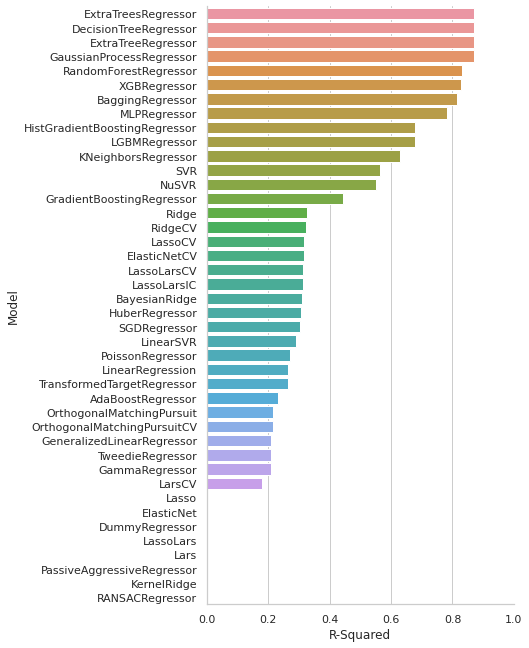

In [15]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(
    nrows = 1,
    ncols = 1,
    figsize = (5.5, 11)
)

ax = sns.barplot(
    y=predictions_train.index, 
    x="R-Squared", 
    data=predictions_train
)

ax.set(xlim=(0, 1))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig(
    "/content/drive/MyDrive/FCC Python for Bioinformatics/figures/Part05/Model_evaluation_R-squared.png",
    bbox_inches = "tight"
)

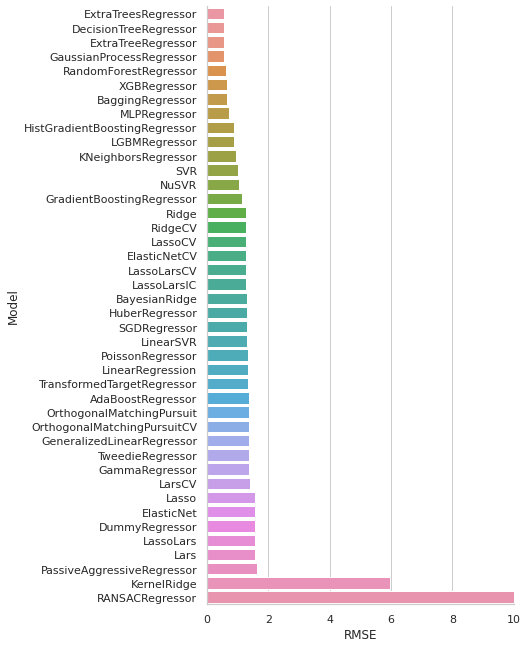

In [18]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(
    nrows = 1,
    ncols = 1,
    figsize = (5.5, 11)
)

ax = sns.barplot(
    y=predictions_train.index, 
    x="RMSE", 
    data=predictions_train
)

ax.set(xlim=(0, 10))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig(
    "/content/drive/MyDrive/FCC Python for Bioinformatics/figures/Part05/Model_evaluation_RMSE.png",
    bbox_inches = "tight"
)

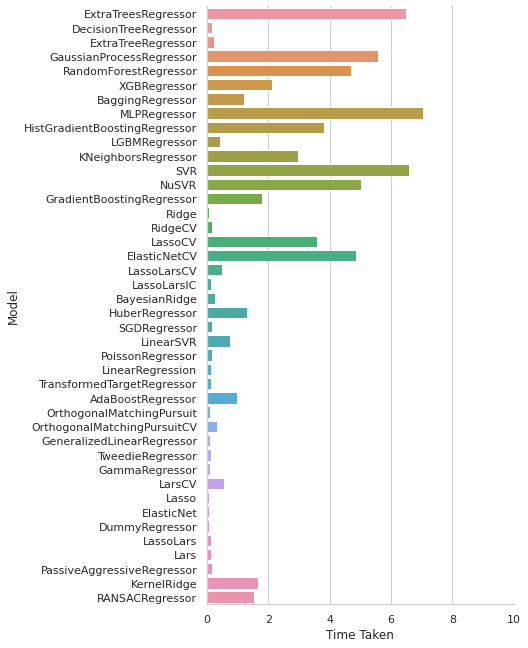

In [19]:
# Bar plot of calculation time values
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(
    nrows = 1,
    ncols = 1,
    figsize = (5.5, 11)
)

ax = sns.barplot(
    y=predictions_train.index, 
    x="Time Taken", 
    data=predictions_train
)

ax.set(xlim=(0, 10))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig(
    "/content/drive/MyDrive/FCC Python for Bioinformatics/figures/Part05/Model_evaluation_time.png",
    bbox_inches = "tight"
)